In [1]:
import numpy as np
trans = np.load(r'final_trans_rot_0100.npy')

In [2]:
phase = np.angle(trans)
# phase = np.load("../../object_phase.npy")

In [3]:
# Assuming you have a reconstruction named o2red in whose phase you suspect you have phase (anti-)vortices, compute the curlarray = numerical curl as described by Zanette et al.
import numpy as np
curlarray=np.zeros( phase.shape) # build an empty array of the proper shape
# Now attach to each pixel (j,i) the 4 summed phase increments as you make the smallest possible square closed loop around (j+1/2,i+1/2)
# NB: choosing in which *sense* you do the loop determines your sign convention i.e. whether a given singularity is evaluated as a phase
# vortex (+2pi) or a phase antivortex (-2pi)
for i in range( phase.shape[1]-1):
    for j in range( phase.shape[0]-1):
        curlarray[j,i]=((phase[j,i+1]-phase[j,i]+ np.pi) % (2*np.pi))-np.pi+\
                       ((phase[j+1,i+1]-phase[j,i+1]+ np.pi) % (2*np.pi))-np.pi+\
                       ((phase[j+1,i]-phase[j+1,i+1]+ np.pi) % (2*np.pi))-np.pi+\
                       ((phase[j,i]-phase[j+1,i]+ np.pi) % (2*np.pi))-np.pi

In [4]:
np.abs(curlarray).sum()

0.0004017353057861328

In [16]:
%matplotlib qt
import matplotlib.pyplot as plt

plt.imshow(curlarray,vmin=-2*np.pi,vmax=2*np.pi)

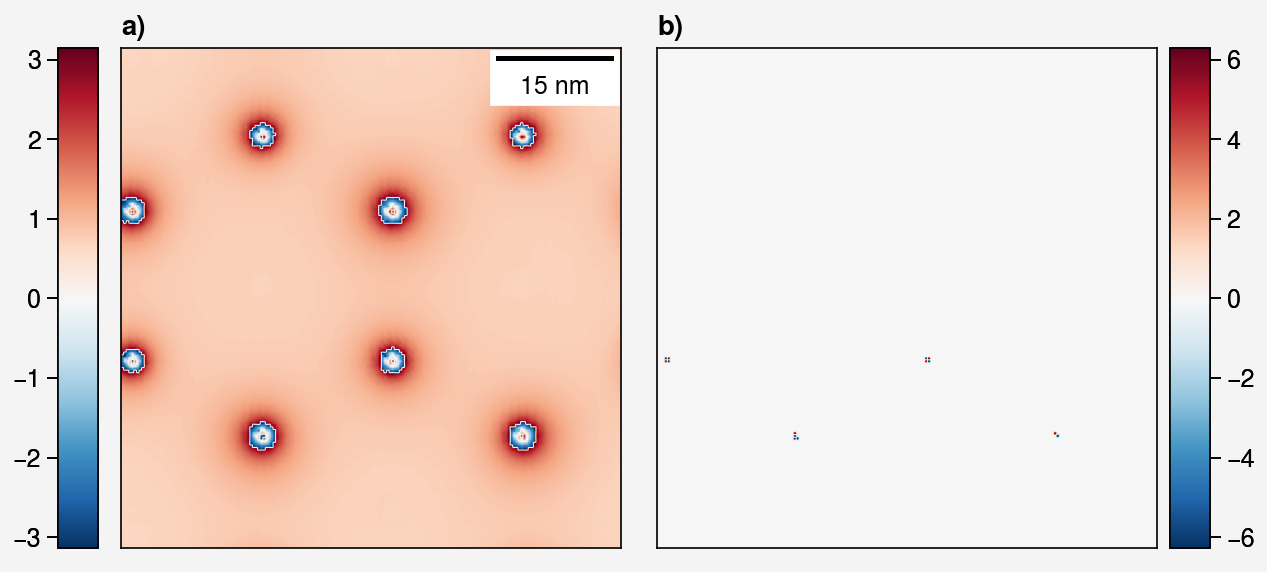

In [12]:
# %matplotlib inline
# import proplot as pplt
# fig, (ax1, ax2) = pplt.subplots(nrows=1, ncols=2, xticks=[], yticks=[], abc="a)")

# m = ax1.imshow(phase)
# ax1.colorbar(m, loc="l")
# m = ax2.imshow(curlarray,vmin=-2*np.pi,vmax=2*np.pi)
# ax2.colorbar(m, loc="r")

# from matplotlib_scalebar.scalebar import ScaleBar
# ax1.add_artist(ScaleBar(00.3269488836259267, "nm", length_fraction=0.25))